## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import pickle

## Reading Data

In [2]:
olx_raw = pd.read_csv("olx_clean.csv")
print(olx_raw.shape)

(3608, 5)


## Data Sample

In [3]:
olx_raw.head()

,Price,Model,Year,Fuel,Milage
0,735008,mahindra-xuv500,2015,diesel,50000
1,737000,mahindra-xuv500,2015,diesel,52000
2,740000,mahindra-xuv500,2015,diesel,54000
3,790000,mahindra-xuv500,2016,diesel,125000
4,124999,mahindra-scorpio,2004,diesel,96000


## Data distribution

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(olx_raw["Price"] )
plt.show()

<Figure size 640x480 with 1 Axes>

18440000


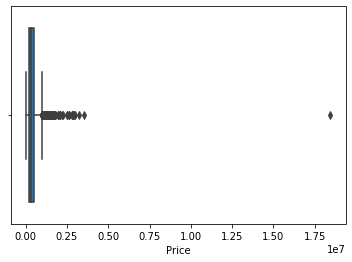

In [5]:
print(max(olx_raw["Price"]))
sns.boxplot(olx_raw["Price"])
plt.show()

## Removing outliers

In [6]:
q = olx_raw["Price"].quantile(0.99)
print(q)
olx_raw = olx_raw[olx_raw["Price"] < q]

1600000.0


## Train-Test split

In [7]:
y = olx_raw['Price']
X = olx_raw[olx_raw.columns.difference(['Price'])]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=124421)

## One-hot-encoding / Dummification

In [8]:
cols_to_transform = ['Model','Fuel']
X_train = pd.get_dummies(columns=cols_to_transform, data=X_train, prefix_sep="_")
X_test = pd.get_dummies(columns=cols_to_transform, data=X_test, prefix_sep="_")

## Aligning Train-Test dataframes

In [9]:
X_train, X_test = X_train.align(X_test,join='outer',axis=1)

In [10]:
print(X_train.shape)
print(X_test.shape)

(2499, 61)
(1071, 61)


## Linear Regression modeling

In [11]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression() 

# Generating model with default parameters using the fit method. 
linreg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Generating predictions for Train-Test datasets

In [12]:
train_pred = linreg.predict(X_train)
test_pred = linreg.predict(X_test)

## Reporting metrics

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

print("The R2 value on train dataset: {} \n".format(r2_score(y_pred=train_pred, y_true=y_train)))

print("The R2 value on test dataset: {} \n".format(r2_score(y_pred=test_pred, y_true=y_test)))


print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))

print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

The R2 value on train dataset: 0.8600812149922649 

The R2 value on test dataset: 0.8362713913327525 

The Mean Squared Error on train dataset: 10318701748.288143 

The Mean Squared Error on test dataset: 10980789712.882957 



## Exporting model (serialization)

In [14]:
from sklearn.externals import joblib
joblib.dump(linreg, "resale_value_predictor.pkl")

/home/sagar/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['resale_value_predictor.pkl']

## Prediction comparision with actual values

In [15]:
pd.DataFrame({'actual':y_test,'predicted':test_pred})

,actual,predicted
2446,720000,638405.496094
3426,975000,656127.630371
2185,95000,68112.371094
1549,285000,347331.650879
582,175000,206065.007812
...,...,...
2443,650000,581464.850586
521,75000,104075.880859
1437,265000,246894.256348
106,310000,411159.308105
